# Introduction
We have seen that for an LTI system the output can be represented as the convolution of the input signal and the impulese responseof the system. This was possible because the input signal can be represented as a linear combination of shifted impulse functions. These shifted impulse signals are orthogonal to each other.

For periodic signlas a lot of analysis becomes easy if we can epresent the signals as a linear combition of harmonic exponential basis functions or sine and cosine basis function. This leads to the fourier series representin for periodic signals.

#Continuous-time Fourier series

*  **Trignometric Fourier series:** This representation involves decomposing the periodic signal as a  linear combination of sine and cosine orthogonal basis function. Consider a periodic signal $x(t)$. The trigonometric Fourier series can be expressed as

## $x(t) = a_o+∑_{n=1}^{∞}[a_n\ cos(n\omega_o t)+b_n \ sin(nω_o t)], \  where$

## $a_o = \frac{1}{T} ∫_0^T x(t)dt$

## $a_n = \frac{2}{T}\int_0^T x(t)cos(n ω_0 t)dt$

## $b_n = \frac{2}{T}\int_0^T x(t)sin(n ω_0 t)dt$

*   **Exponential Fourier series:** This representation involves decomposing the periodic signal as a  linear combination of harmonic exponential basis function. Consider a periodic signal $x(t)$. The exponential Fourier series can be expressed as

## $x(t) = ∑_{-∞}^{∞}X_n e^{jn\omega_0 t}, \  where$

## $X_n = \frac{1}{T}\int_0^T x(t)e^{-jn\omega_0 t}$



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown, IntSlider
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

def square_wave(t, T):
    return np.where((t % T) < T/2, 1, -1)

def triangle_wave(t, T):
    return 4*np.abs(((t % T) / T) - 0.5) - 1

def sawtooth_wave(t, T):
    return 2 * ((t % T)/T) - 1

def compute_trig_coeffs(x, t, T, N):
    omega0 = 2 * np.pi / T
    a0 = (2 / T) * np.trapezoid(x, t)
    an = []
    bn = []
    for n in range(1, N+1):
        cos_term = np.cos(n * omega0 * t)
        sin_term = np.sin(n * omega0 * t)
        an.append((2 / T) * np.trapezoid(x * cos_term, t))
        bn.append((2 / T) * np.trapezoid(x * sin_term, t))
    return a0, np.array(an), np.array(bn)

def reconstruct_signal(a0, an, bn, t, T):
    omega0 = 2 * np.pi / T
    x_approx = a0 * np.ones_like(t)
    for n in range(1, len(an) + 1):
        x_approx += an[n-1] * np.cos(n * omega0 * t) + bn[n-1] * np.sin(n * omega0 * t)
    return x_approx

def plot_fourier(signal_type, N):
    T = 2 * np.pi
    t = np.linspace(0, T, 1000)

    if signal_type == "Square Wave":
        x = square_wave(t, T)
    elif signal_type == "Triangle Wave":
        x = triangle_wave(t, T)
    elif signal_type == "Sawtooth Wave":
        x = sawtooth_wave(t, T)
    else:
        x = np.zeros_like(t)

    a0, an, bn = compute_trig_coeffs(x, t, T, N)
    x_approx = reconstruct_signal(a0, an, bn, t, T)

    plt.figure(figsize=(12, 5))
    plt.plot(t, x, label="Original Signal", color='black', linewidth=2)
    plt.plot(t, x_approx, label=f"Fourier Approx. (N={N})", color='red', linestyle='--')
    plt.title(f"Fourier Trigonometric Series Approximation of {signal_type}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(plot_fourier,
         signal_type=Dropdown(options=["Square Wave", "Triangle Wave", "Sawtooth Wave"], description="Signal:"),
         N=IntSlider(min=1, max=50, step=1, value=5, description="Harmonics"))


interactive(children=(Dropdown(description='Signal:', options=('Square Wave', 'Triangle Wave', 'Sawtooth Wave'…

<function __main__.plot_fourier(signal_type, N)>

# Polar representation of trigonometric Fourier series

The trigonometric Fourier series representation has a compact representation in polar form given by

## $x(t) = c_0 +\sum_{n=1}^{\infty} c_n cos(n ω_0 t +θ), \  where$

## $c_0=a_0$

## $c_n$(line spectrum) $=\sqrt{a^2_n+b^2_n}$ for $n \geq1$

## $a_n=c_n \ sin(\phi_n)$, $b_n=c_n \ cos(\phi_n)$ and $\phi_n = \tan^{-1}(\frac{a_n}{b_n})$

## $θ$ (phase spectrum) $= tan^{-1}(\frac{-b_n}{a_n})$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown, IntSlider

sns.set(style="whitegrid")

def square_wave(t, T):
    return np.where((t % T) < T/2, 1, -1)

def triangle_wave(t, T):
    return 4*np.abs(((t % T) / T) - 0.5) - 1

def sawtooth_wave(t, T):
    return 2 * ((t % T)/T) - 1

def half_wave_rectified_sine(t, T):
    return np.maximum(np.sin(2 * np.pi * t / T), 0)

def full_wave_rectified_sine(t, T):
    return np.abs(np.sin(2 * np.pi * t / T))

def dirichlet_kernel(t, T):
    return np.sin(5 * np.pi * t / T) / np.sin(np.pi * t / T + 1e-10)

def compute_trig_coeffs(x, t, T, N):
    omega0 = 2 * np.pi / T
    a0 = (2 / T) * np.trapezoid(x, t)
    an = []
    bn = []
    for n in range(1, N + 1):
        an.append((2 / T) * np.trapezoid(x * np.cos(n * omega0 * t), t))
        bn.append((2 / T) * np.trapezoid(x * np.sin(n * omega0 * t), t))
    return a0 / 2, np.array(an), np.array(bn)

def plot_spectrum(signal_type, N):
    T = 2 * np.pi
    t = np.linspace(0, T, 1000)

    signal_map = {
        "Square Wave": square_wave,
        "Triangle Wave": triangle_wave,
        "Sawtooth Wave": sawtooth_wave,
        "Half-wave Rectified Sine": half_wave_rectified_sine,
        "Full-wave Rectified Sine": full_wave_rectified_sine,
        "Dirichlet Kernel (truncated)": dirichlet_kernel
    }

    signal_func = signal_map[signal_type]
    x = signal_func(t, T)

    a0, an, bn = compute_trig_coeffs(x, t, T, N)
    n_vals = np.arange(1, N + 1)
    Cn = np.sqrt(an**2 + bn**2)
    phi_n = -np.arctan2(bn, an)

    plt.figure(figsize=(12, 4))
    plt.stem(n_vals, Cn, basefmt="")
    plt.title(f"Line Spectrum |Cₙ| - {signal_type}")
    plt.xlabel("Harmonic (n)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.stem(n_vals, phi_n, basefmt="")
    plt.title(f"Phase Spectrum ∠Cₙ - {signal_type}")
    plt.xlabel("Harmonic (n)")
    plt.ylabel("Phase (radians)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(
    plot_spectrum,
    signal_type=Dropdown(
        options=[
            "Square Wave",
            "Triangle Wave",
            "Sawtooth Wave",
            "Half-wave Rectified Sine",
            "Full-wave Rectified Sine",
            "Dirichlet Kernel (truncated)"
        ],
        description="Signal:"
    ),
    N=IntSlider(min=1, max=50, step=1, value=10, description="Harmonics")
)

interactive(children=(Dropdown(description='Signal:', options=('Square Wave', 'Triangle Wave', 'Sawtooth Wave'…

<function __main__.plot_spectrum(signal_type, N)>

# Your task (These tasks will increase your sense of practical use of frequency analysis)
1.  Observe the Fourier series representation of the signals, and write python code to get the power of the signal from time domain signal and the corresponding Fourier domain representations.
2. Add two more signal of your wish and do the Fourier series analysis using the above two codes.
3. Change the time period of the above signals and comment on how the Fourier series coefficients are changing.

### Time vs Frequency Power Calculations

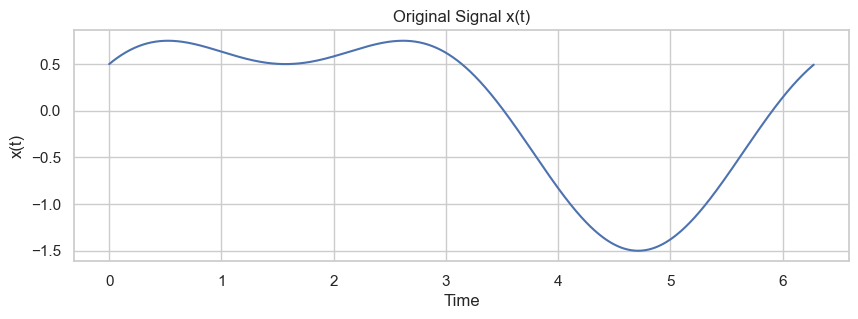

Power (Time Domain): 0.6248
Power (Frequency Domain): 0.6250


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 2 * np.pi
t = np.linspace(0, T, 1000, endpoint=False)
x = np.sin(t) + 0.5 * np.cos(2*t)

P_time = (1 / T) * np.trapezoid(np.abs(x)**2, t)

N = len(t)
X_fft = np.fft.fft(x) / N
freqs = np.fft.fftfreq(N, d=(T / N))

C_n = np.fft.fftshift(X_fft)
P_freq = np.sum(np.abs(C_n)**2)

plt.plot(t, x)
plt.title("Original Signal x(t)")
plt.xlabel("Time"); plt.ylabel("x(t)")
plt.grid(True)
plt.show()

print(f"Power (Time Domain): {P_time:.4f}")
print(f"Power (Frequency Domain): {P_freq:.4f}")


### Adding two more singals

In [23]:
# Define more signals
signals = {
    "x1(t) = sin(t) + 0.5 cos(2t)": np.sin(t) + 0.5 * np.cos(2*t),
    "x2(t) = square wave": np.sign(np.sin(t)),
    "x3(t) = sawtooth wave": (t % T) / T
}

for name, x_sig in signals.items():
    X_fft = np.fft.fft(x_sig) / N
    C_n = np.fft.fftshift(X_fft)
    P_t = (1 / T) * np.trapezoid(np.abs(x_sig)**2, t)
    P_f = np.sum(np.abs(C_n)**2)
    
    print(f"\n{name}")
    print(f"  Power (Time Domain): {P_t:.4f}")
    print(f"  Power (Frequency Domain): {P_f:.4f}")



x1(t) = sin(t) + 0.5 cos(2t)
  Power (Time Domain): 0.6248
  Power (Frequency Domain): 0.6250

x2(t) = square wave
  Power (Time Domain): 0.9985
  Power (Frequency Domain): 0.9990

x3(t) = sawtooth wave
  Power (Time Domain): 0.3323
  Power (Frequency Domain): 0.3328


### Change Time Period and Observe Coefficients

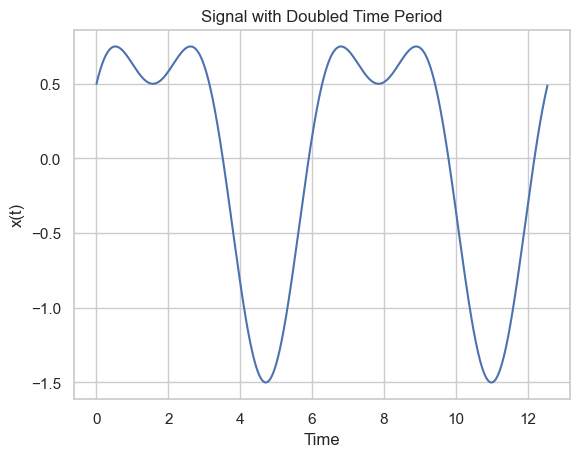

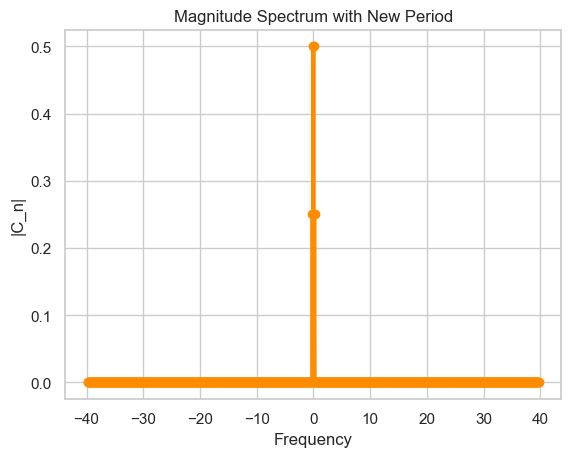

In [20]:
# Double the time period
T_new = 4 * np.pi
t_new = np.linspace(0, T_new, 1000, endpoint=False)
x_new = np.sin(t_new) + 0.5 * np.cos(2*t_new)

X_fft_new = np.fft.fft(x_new) / len(t_new)
C_n_new = np.fft.fftshift(X_fft_new)

plt.plot(t_new, x_new)
plt.title("Signal with Doubled Time Period")
plt.xlabel("Time"); plt.ylabel("x(t)")
plt.grid(True)
plt.show()

freqs_new = np.fft.fftshift(np.fft.fftfreq(len(t_new), d=(T_new/len(t_new))))
plt.plot(freqs_new, np.abs(C_n_new), marker='o', linestyle='-', color='darkorange')
plt.title("Magnitude Spectrum with New Period")
plt.xlabel("Frequency"); plt.ylabel("|C_n|")
plt.grid(True)
plt.show()